In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2)

x = np.array(range(-6, 3))
x_train = (x / max(abs(x))).reshape(-1, 1)
x_train = poly.fit_transform(x_train)

In [ ]:
inp = Input((3)) 
out = Dense(1)(inp)
model = Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss="mean_squared_error")

In [ ]:
y = np.array([71.82, 50, 32.24, 18.54, 8.9, 3.32, 1.8, 4.34, 10.94])
y_train = (y / max(abs(y)))

In [ ]:
model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 2/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 3/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 5/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 6/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 7/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 9/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0028
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.0028
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0028
Epoch 13/1000
1/1 [=============================

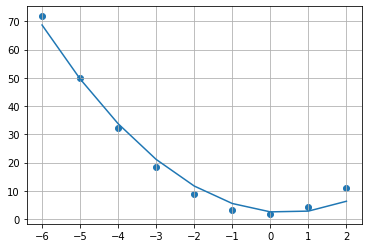

In [ ]:
import matplotlib.pyplot as plt
plt.grid()
plt.scatter(x, y)
plt.plot(x, model.predict(x_train) * max(abs(y)))
plt.show()

In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Умова: якщо «Параметр 1» = 1, то 1-й клас, якщо «Параметр 2» = «Параметр
3», то 2-й клас, інакше – 3-й клас.

Задамо таблицю:

In [ ]:
input = [
         [0,0,0],
         [0,0,1],
         [0,1,0],
         [0,1,1],
         [1,0,0],
         [1,0,1],
         [1,1,0],
         [1,1,1],
]
output = [
          3,
          3,
          3,
          2,
          1,
          1,
          1,
          1
]

In [ ]:
import keras.models as M
import keras.layers as L
import keras.backend as K
import tensorflow as tf

In [ ]:
input_train = np.array(input)
output_train = tf.keras.utils.to_categorical(np.array(output) - 1, 3)

K.clear_session()
model = M.Sequential()
model.add(L.Dense(3, activation='sigmoid'))
model.add(L.Dense(100, activation='sigmoid'))
model.add(L.Dense(100, activation='sigmoid'))
model.add(L.Dense(3, activation='sigmoid'))

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)
model.fit(
  input_train,
  output_train,
  epochs=500
)

Epoch 1/500
1/1 [==============================] - 0s 439ms/step - loss: 1.1672 - accuracy: 0.3750
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 1.1066 - accuracy: 0.3750
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0587 - accuracy: 0.3750
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 1.0242 - accuracy: 0.1250
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 1.0022 - accuracy: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.9903 - accuracy: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.9852 - accuracy: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.9837 - accuracy: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 10ms/step - loss: 0.9836 - accuracy: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9839 - accuracy: 0.5000
Epoch 11/500
1/1 [========

100% точність на навчальних даних:

In [ ]:
def from_categorical(output):
  return np.argmax(output, axis=-1) + 1


from_categorical(model.predict(input))

array([3, 3, 3, 2, 1, 1, 1, 1])

Не передбачається вхід значень, відмінних від 0 чи 1, отже таблиця з тренувальними даними покриває всі можливі входи. Це зачить що треба було досягти overfitting, і ми це зробили.